In [ ]:
import random
import numpy as np

# Определение параметров генетического алгоритма
population_size = 100
chromosome_length = 10
mutation_probability = 0.01
max_generations = 1000

# Определение поисковой области
search_range = (-2.048, 2.048)

# Определение функции Розенброка
def rosenbrock_function(x):
    return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1))

# Инициализация начальной популяции
def initialize_population():
    population = []
    for _ in range(population_size):
        chromosome = np.random.uniform(search_range[0], search_range[1], chromosome_length)
        population.append(chromosome)
    return population

# Оценка приспособленности особей в популяции
def evaluate_fitness(population):
    fitness = []
    for chromosome in population:
        fitness.append(rosenbrock_function(chromosome))
    return fitness

# Выбор родителей методом очистки
def select_parents(population, fitness):
    parents = []
    for _ in range(population_size):
        # Выбор случайного родителя из популяции
        parent_index = random.randint(0, population_size-1)
        parents.append(population[parent_index])
    return parents

# Симулированное бинарное скрещивание
def crossover(parents):
    offspring = []
    for i in range(0, population_size, 2):
        parent1 = parents[i]
        parent2 = parents[i+1]
        child1 = np.zeros(chromosome_length)
        child2 = np.zeros(chromosome_length)
        for j in range(chromosome_length):
            alpha = random.uniform(0, 1)
            child1[j] = alpha * parent1[j] + (1 - alpha) * parent2[j]
            child2[j] = alpha * parent2[j] + (1 - alpha) * parent1[j]
        offspring.append(child1)
        offspring.append(child2)
    return offspring

# Равномерная мутация
def mutate(offspring):
    for i in range(population_size):
        for j in range(chromosome_length):
            if random.uniform(0, 1) < mutation_probability:
                offspring[i][j] += random.uniform(-1, 1) * (search_range[1] - search_range[0])
                offspring[i][j] = np.clip(offspring[i][j], search_range[0], search_range[1])
    return offspring

# Генетический алгоритм
def genetic_algorithm():
    population = initialize_population()
    best_fitness = float('inf')
    best_solution = None

    for generation in range(max_generations):
        fitness = evaluate_fitness(population)

        # Проверка критерия сходимости
        if min(fitness) >= best_fitness:
            break

        # Обновление лучшего решения
        best_index = np.argmin(fitness)
        best_fitness = fitness[best_index]
        best_solution = population[best_index]

        parents = select_parents(population, fitness)
        offspring = crossover(parents)
        offspring = mutate(offspring)

        population = offspring

    return best_solution, best_fitness

# Запуск генетического алгоритма
best_solution, best_fitness = genetic_algorithm()

print("Лучшее решение:", best_solution)
print("Лучшая приспособленность:", best_fitness)

Лучшее решение: [ 0.28627278 -0.1780168   0.07112352 -0.10804184 -0.03424109  0.30861451
  0.36371462  0.30780349  0.09930061 -0.36675976]
Лучшая приспособленность: 49.56117804902543


Best X: 0.2862727798812744, Best Y: -0.17801680146289894
Best Fitness: 49.56117804902543
Math X: 1, Math Y: 1
Math Fitness: 0


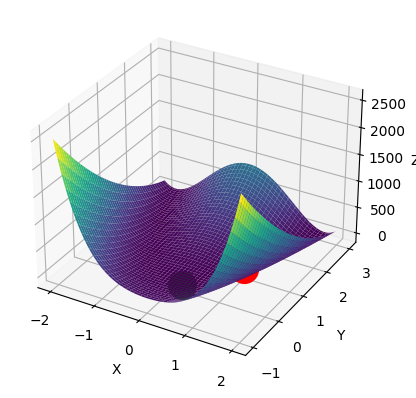

In [ ]:
import matplotlib.pyplot as plt

# Функция Розенброка
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Построение графика поверхности Розенброка
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Найденный локальный минимум (по формуле)
best_solution_math = [1, 1]
best_fitness_math = rosenbrock(*best_solution_math)

ax.scatter(best_solution_math[0], best_solution_math[1], best_fitness_math, color='red', s=400)
ax.scatter(best_solution[0], best_solution[1], best_fitness, color='green', s=400)

print(f"Best X: {best_solution[0]}, Best Y: {best_solution[1]}")
print(f"Best Fitness: {best_fitness}")

print(f"Math X: {best_solution_math[0]}, Math Y: {best_solution_math[1]}")
print(f"Math Fitness: {best_fitness_math}")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

(100, 100)
(100, 100)
(100, 100)


ValueError: ignored

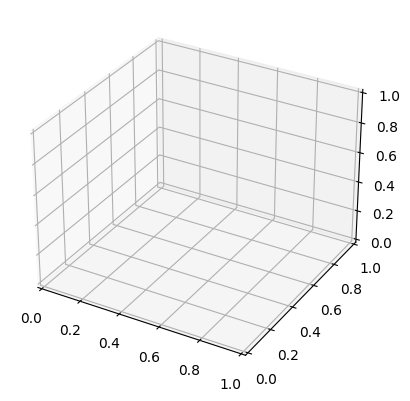

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x, y):
    return 100.0 * (y - x**2)**2 + (1 - x)**2

# Создание гиперплоскости Розенброка
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = rosenbrock(x_vals, y_vals)

print(x_vals.shape)
print(y_vals.shape)
print(z_vals.shape)

# Отображение гиперплоскости Розенброка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_vals, y_vals, z_vals, cmap='viridis', alpha=0.8)

# Отображение лучшего решения на графике
ax.scatter([best_solution[0]], [best_solution[1]],
           rosenbrock_function(best_solution[0], best_solution[1]),
           color='red', s=100, label='Best Solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Rosenbrock Function')
ax.legend()

# Вывод результата
print("Лучшее решение:", best_solution)
print("Лучшая приспособленность:", best_fitness)

# Отображение графика
plt.show()

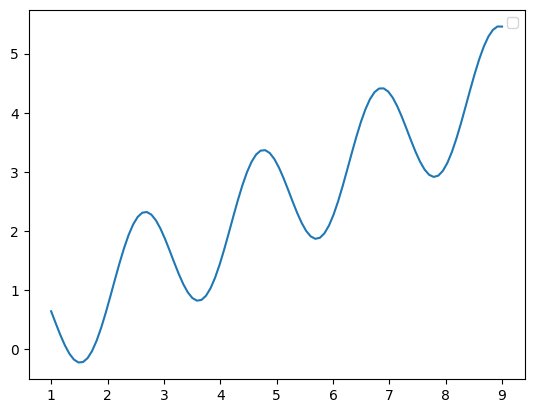

Выходные данные были обрезаны до нескольких последних строк (5000).
8.861572265625
1068.1974650179816
8.861572265625
178.5818875621175
8.861572265625
871.9088076483935
8.861632119227083
205.758376525895
8.86163330078125
470.3969462696849
8.861572265625
142.5235605467786
8.861572265625
327.4798448529211
8.86163330078125
997.9418918317226
8.861632119227083
1056.9100816955722
8.861572265625
805.2280091241137
8.861572265625
204.5676547758027
8.86163330078125
1061.0269720214646
8.861572265625
656.1695006936773
8.86163330078125
152.45941023278462
8.86163330078125
437.12956456408386
8.861632119227083
478.50816169843773
8.861572265625
640.1577969912771
8.86163330078125
707.667163964372
8.861572265625
30.62691366658246
8.861572265625
52.280541710454216
8.861572265625
83.06926543536605
8.861632119227083
683.7238671970242
8.861632119227083
1069.3817036776059
8.861572265625
590.6255482292286
8.86163330078125
944.0531196248629
8.861572265625
680.5177477132377
8.861572265625
43.016462985179686
8.861

8.86163330078125
360.38686689744264
8.861572265625
236.4444185104456
8.86163330078125
739.6247128143257
8.86163330078125
115.97676744681134
8.861572265625
660.8719016382288
8.861572265625
160.3410791883058
8.861572265625
934.9298287894046
8.861572265625
573.1329899415789
8.86163330078125
985.2173321064352
8.861572265625
673.206374958746
8.86163330078125
915.0180339190297
8.86163330078125
1003.6355368296624
8.86163330078125
566.9634843112817
8.86163330078125
754.9276944835833
8.86163330078125
570.4708129449332
8.86163330078125
553.5711794262033
8.86163330078125
190.81035670085353
8.861572265625
20.62078939077692
8.86163330078125
665.1717673813619
8.86163330078125
293.26128222969214
8.86163330078125
54.7444842150589
8.86163330078125
164.66777683759446
8.86163330078125
913.7203760521575
8.86163330078125
708.1404698657584
8.861572265625
143.55413247810964
8.86163330078125
283.09541579444897
8.861572265625
241.13770249271676
8.861572265625
804.5678291882689
8.86163330078125
562.141648384539

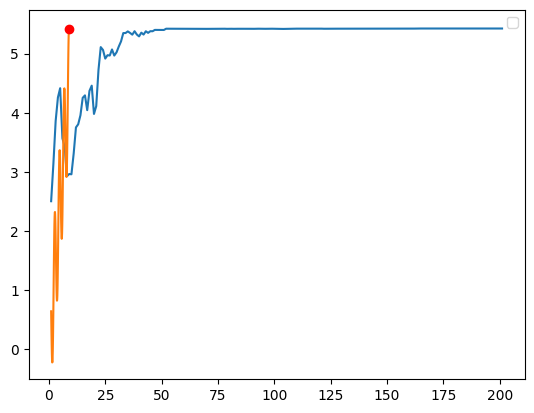

In [ ]:
import numpy as np
from numpy.lib.function_base import average
import pandas  as pd
import matplotlib.pyplot as plt
import random
zhongqun_cnt = 100 # Chromosome number of population
p_jiaohuan = 60    # The probability of exchange is 60%
p_bianyi = 10      # The probability of variation is 10%
x_min = 1          # The minimum argument is 1
x_max = 9          # The maximum independent variable is 9
rotate_cnt = 200  # Genetic algebra
#%%
# Define function expression
def calc(x):
    return 1/2*x+np.sin(3*x)
#%%
# Define a mapping function to map the specified range of decimal to binary
# (not a simple mapping, but the same stretch) this is a scale problem
def dec2bin(x):
    return bin(int((2**17)*((x-1)/8)))
# Contrary to the above function
def bin2dec(x):
    x1 = int(x, 2)
    return x1/(2**17)*8+1
#%%
# Show the whole graph first
x = np.linspace(x_min,x_max,100)
y = calc(x)
plt.plot(x, y)
plt.legend()
plt.show()
# %%
# 0-1
# 2^17-9
#The Zhongqun to be used in the initial rotation method is randomly selected_ CNT gene
init_population = np.random.uniform(x_min,x_max,zhongqun_cnt)
# %%
# Fitness function
def fitness(x):
    return calc(x)
#%%

# Select the function and select Zhongqun through the rotation method_ CNT initial population
# The input is the random previous generation, and the output is the gene selected by the rotation method (hexadecimal)
def select(x):
    data = pd.DataFrame(x, columns=['ori_data'])
    data['fitness'] = fitness(data['ori_data'])
    # Because the fitness has a negative number, I move up as a whole and make it all positive (move up the lowest negative number)
    data['fitness_processed'] = data['fitness'] + abs(data['fitness'].min())
    # Add accumulation, and pay attention to the left closing and right opening
    data['leiji'] = [sum(data['fitness_processed'][0:i]) for i in range(1, data.shape[0] + 1 )]
    print(data)
    # Start selection and randomly generate the random number with the cumulative value in the range of 0-(zhongqun_cnt-1), and take
    # The number corresponding to the cumulative number greater than or equal to the random number. In this way, Zhongqun is taken_ CNT
    select_dict = []
    while len(select_dict) < data.shape[0]:
        suijishu = np.random.uniform(data['leiji'][0], data['leiji'][data.shape[0] - 1], 1)[0]
        print(suijishu)
        xuanzeshu = data[data['leiji'] >= suijishu]['ori_data'].iloc[0]
        print(xuanzeshu)
        select_dict.append(xuanzeshu)
    return select_dict


# For gene exchange operation, single point exchange is adopted here because the binary is 17 bits
# So here we randomly exchange the middle of the two genes
# The input is the two genes to be exchanged, and the output is the two genes to be exchanged (binary input)
def exchangge(x, y, div = 0.5):
    weishu = len(x) - 2
    # Subtract 2 because 0b will occupy 2 positions
    percent = int(div * weishu)
    # Start combination
    x1 = x[:2+percent] + y[-(weishu-percent):-1] + y[-1]
    # print(x1)
    y1 = y[:2+percent] + x[-(weishu-percent):-1] + x[-1]
    # print(y1)
    return x1, y1


# For gene mutation operation, random inversion is adopted here
# Input is binary
#%%
def variation(x, y):
    x1 = x[:-1] + str((int(x[-1]) + 1)%2)
    print(x1)
    y1 = y[:-1] + str((int(y[-1]) + 1)%2)
    print(y1)
    return x1, y1

# Probability execution function
def random_run(probability):
    """with probability%Probabilistic execution func(*args)"""
    list = []
    for i in range(probability):
        list.append(1)#Put probability 1 in the list
    for x in range(100 - probability):
        list.append(0)#Put the remaining positions into 0
    a = random.choice(list)#Take one at random
    return a
#%%
# Main function
# Determine the initial population
selected = select(init_population)
# Start to enter the 30 rounds of survival of the fittest
average_genes = []
average_genes.append(fitness(average(selected)))
while rotate_cnt:
    rotate_cnt -= 1
    # Probability exchange
    index_x = random.randint(0, 19)
    index_y = random.randint(0, 19)
    # If you win, swap
    if random_run(p_jiaohuan):
        x1, y1 = exchangge(dec2bin(selected[index_x]), dec2bin(selected[index_y]))
        selected[index_x], selected[index_y] = bin2dec(x1), bin2dec(y1)
    # Probability variation (variation if selected)
    index_x = random.randint(0, 19)
    index_y = random.randint(0, 19)
    if random_run(p_bianyi):
        x2, y2 = variation(dec2bin(selected[index_x]), dec2bin(selected[index_y]))
        selected[index_x], selected[index_y] = bin2dec(x2), bin2dec(y2)
    # Select again
    selected = select(selected)
    average_genes.append(fitness(average(selected)))
#%%
plt.plot(list(range(1, len(average_genes) + 1)),average_genes)


# %%
# Print out the position of the best point and have a look
x = np.linspace(x_min,x_max,100)
y = calc(x)
plt.plot(x, y)
plt.plot(average(selected), fitness(average(selected)), marker='o', color='red')
plt.legend()
plt.show()